In [23]:


import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
from utility_functions import get_nba_season_year

In [24]:

year = input('Year: ')
if year == '':
    year = int(get_nba_season_year())

In [25]:
sns.set_style('whitegrid')
# sns.set_palette('deep')

In [26]:
data_dir = f'../ML - Regression/Historic Predictions/{year}'
file = sorted(os.listdir(data_dir))[-1]
file_path = os.path.join(data_dir, file)
print(file_path)

../ML - Regression/Historic Predictions/2024/20240130_MVP_Predictions.csv


In [27]:
date_str = file.split('_')[0]

# Convert the extracted string to a datetime object
date_obj = datetime.strptime(date_str, '%Y%m%d')

# Format the date as "Jan 1, 2024"
formatted_date = date_obj.strftime('%b %d, %Y')


In [28]:
df = pd.read_csv(file_path)

if 'Predicted Vote Share' not in df.columns:
    df['Predicted Vote Share'] = np.nan
df

,pred_rank,Player,G,PTS,TS%,AST,TRB,STL,BLK,OWS,DWS,WS/48,BPM,VORP,Predicted Vote Share
0,1,Joel Embiid,33,36.0,65.0%,5.8,11.4,1.1,1.8,5.1,2.1,0.309,12.8,4.2,0.45851
1,2,Nikola Jokić,47,26.3,65.5%,9.0,12.1,1.2,0.9,7.3,2.7,0.304,14.2,6.5,0.44767
2,3,Giannis Antetokounmpo,45,31.0,64.6%,6.2,11.7,1.3,1.1,5.5,2.2,0.235,8.3,4.1,0.37762
3,4,Shai Gilgeous-Alexander,46,31.3,65.0%,6.4,5.6,2.2,0.7,7.2,2.7,0.301,10.2,4.9,0.25254
4,5,Tyrese Haliburton,34,23.6,63.2%,12.6,4.1,1.1,0.6,5.1,0.5,0.238,8.9,3.2,0.24812
5,6,Luka Dončić,40,34.7,61.6%,9.6,8.6,1.4,0.6,4.9,1.7,0.210,9.7,4.5,0.17101
6,7,Stephen Curry,40,27.3,62.3%,5.0,4.2,0.9,0.4,3.0,0.8,0.134,4.7,2.2,0.05418
7,8,Jayson Tatum,44,26.9,60.0%,4.4,8.5,1.0,0.5,3.2,2.6,0.175,4.7,2.6,0.04415
8,9,Damian Lillard,44,25.1,59.9%,6.8,4.3,1.1,0.2,4.1,1.0,0.160,2.4,1.7,0.03483
9,10,Donovan Mitchell,35,27.7,58.4%,6.3,5.5,1.9,0.5,2.4,2.1,0.175,6.6,2.7,0.03443


In [29]:
# Assuming df is your DataFrame

# Convert 'Predicted Vote Share' from percentage strings to floats

df['Predicted Vote Share'] = df['Predicted Vote Share'].astype(str).str.rstrip('%').astype('float') / 100
print(df.loc[:,['Predicted Vote Share',]])

# Fill NaN values in 'Predicted Vote Share' with values from 'pred'
if 'pred' in df.columns:
    df['Predicted Vote Share'].fillna(df['pred'], inplace=True)
    print(df.loc[:,['Predicted Vote Share','pred']])

   Predicted Vote Share
0              0.004585
1              0.004477
2              0.003776
3              0.002525
4              0.002481
5              0.001710
6              0.000542
7              0.000441
8              0.000348
9              0.000344


In [30]:
# data_dir = f'../ML - Regression/Historic Predictions/{get_nba_season_year()}'
data_dir = f'../ML - Regression/Historic Predictions/{year}'

l = []
for i in sorted(os.listdir(data_dir)):
    print(i[:8])
    stat = pd.read_csv(os.path.join(data_dir,i))
    stat['Date'] = i[:8]
    stat['Date'] = pd.to_datetime(stat['Date'])
    l.append(stat)
df = pd.concat(l)
del(l)
df

20231231
20240101
20240102
20240103
20240105
20240106
20240107
20240108
20240109
20240110
20240111
20240114
20240115
20240116
20240117
20240118
20240119
20240120
20240121
20240122
20240123
20240124
20240125
20240126
20240130


,pred_rank,Player,G,PTS,TS%,AST,TRB,STL,BLK,OWS,DWS,WS/48,BPM,pred,Date,Predicted Vote Share,VORP
0,1,Joel Embiid,25,35.0,0.651,6.0,11.7,1.2,2.0,3.9,1.7,0.315,12.6,0.47252,2023-12-31,NaN,NaN
1,2,Tyrese Haliburton,28,24.6,0.638,12.8,4.0,1.0,0.6,4.5,0.2,0.235,8.3,0.31836,2023-12-31,NaN,NaN
2,3,Shai Gilgeous-Alexander,29,31.4,0.644,6.3,5.7,2.7,0.8,4.5,2.0,0.310,11.2,0.29211,2023-12-31,NaN,NaN
3,4,Nikola Jokić,33,26.1,0.629,9.2,12.3,1.2,0.8,4.9,2.0,0.301,13.9,0.23215,2023-12-31,NaN,NaN
4,5,Luka Dončić,30,33.9,0.617,9.3,8.4,1.4,0.6,3.5,1.3,0.208,9.6,0.21738,2023-12-31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,6,Luka Dončić,40,34.7,61.6%,9.6,8.6,1.4,0.6,4.9,1.7,0.210,9.7,NaN,2024-01-30,0.17101,4.5
6,7,Stephen Curry,40,27.3,62.3%,5.0,4.2,0.9,0.4,3.0,0.8,0.134,4.7,NaN,2024-01-30,0.05418,2.2
7,8,Jayson Tatum,44,26.9,60.0%,4.4,8.5,1.0,0.5,3.2,2.6,0.175,4.7,NaN,2024-01-30,0.04415,2.6
8,9,Damian Lillard,44,25.1,59.9%,6.8,4.3,1.1,0.2,4.1,1.0,0.160,2.4,NaN,2024-01-30,0.03483,1.7


In [31]:
df['Predicted Vote Share'] = round((df["pred"] * 100),2).astype(str) + '%'
df

,pred_rank,Player,G,PTS,TS%,AST,TRB,STL,BLK,OWS,DWS,WS/48,BPM,pred,Date,Predicted Vote Share,VORP
0,1,Joel Embiid,25,35.0,0.651,6.0,11.7,1.2,2.0,3.9,1.7,0.315,12.6,0.47252,2023-12-31,47.25%,NaN
1,2,Tyrese Haliburton,28,24.6,0.638,12.8,4.0,1.0,0.6,4.5,0.2,0.235,8.3,0.31836,2023-12-31,31.84%,NaN
2,3,Shai Gilgeous-Alexander,29,31.4,0.644,6.3,5.7,2.7,0.8,4.5,2.0,0.310,11.2,0.29211,2023-12-31,29.21%,NaN
3,4,Nikola Jokić,33,26.1,0.629,9.2,12.3,1.2,0.8,4.9,2.0,0.301,13.9,0.23215,2023-12-31,23.21%,NaN
4,5,Luka Dončić,30,33.9,0.617,9.3,8.4,1.4,0.6,3.5,1.3,0.208,9.6,0.21738,2023-12-31,21.74%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,6,Luka Dončić,40,34.7,61.6%,9.6,8.6,1.4,0.6,4.9,1.7,0.210,9.7,NaN,2024-01-30,nan%,4.5
6,7,Stephen Curry,40,27.3,62.3%,5.0,4.2,0.9,0.4,3.0,0.8,0.134,4.7,NaN,2024-01-30,nan%,2.2
7,8,Jayson Tatum,44,26.9,60.0%,4.4,8.5,1.0,0.5,3.2,2.6,0.175,4.7,NaN,2024-01-30,nan%,2.6
8,9,Damian Lillard,44,25.1,59.9%,6.8,4.3,1.1,0.2,4.1,1.0,0.160,2.4,NaN,2024-01-30,nan%,1.7


In [32]:
df['Predicted Vote Share'] = np.where(
    df['Predicted Vote Share'].isna() & df['pred'].notna(),
    round(df['pred'] * 100,1).astype(str) + '%',
    df['Predicted Vote Share']
)

# df['pred'] = np.where(
#     df['pred'].isna() & df['Predicted Vote Share'].notna(),
#     df['Predicted Vote Share'].astype(str).rstrip('%').str.astype(float) / 100,
#     df['pred']
# )

In [33]:
df

,pred_rank,Player,G,PTS,TS%,AST,TRB,STL,BLK,OWS,DWS,WS/48,BPM,pred,Date,Predicted Vote Share,VORP
0,1,Joel Embiid,25,35.0,0.651,6.0,11.7,1.2,2.0,3.9,1.7,0.315,12.6,0.47252,2023-12-31,47.25%,NaN
1,2,Tyrese Haliburton,28,24.6,0.638,12.8,4.0,1.0,0.6,4.5,0.2,0.235,8.3,0.31836,2023-12-31,31.84%,NaN
2,3,Shai Gilgeous-Alexander,29,31.4,0.644,6.3,5.7,2.7,0.8,4.5,2.0,0.310,11.2,0.29211,2023-12-31,29.21%,NaN
3,4,Nikola Jokić,33,26.1,0.629,9.2,12.3,1.2,0.8,4.9,2.0,0.301,13.9,0.23215,2023-12-31,23.21%,NaN
4,5,Luka Dončić,30,33.9,0.617,9.3,8.4,1.4,0.6,3.5,1.3,0.208,9.6,0.21738,2023-12-31,21.74%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,6,Luka Dončić,40,34.7,61.6%,9.6,8.6,1.4,0.6,4.9,1.7,0.210,9.7,NaN,2024-01-30,nan%,4.5
6,7,Stephen Curry,40,27.3,62.3%,5.0,4.2,0.9,0.4,3.0,0.8,0.134,4.7,NaN,2024-01-30,nan%,2.2
7,8,Jayson Tatum,44,26.9,60.0%,4.4,8.5,1.0,0.5,3.2,2.6,0.175,4.7,NaN,2024-01-30,nan%,2.6
8,9,Damian Lillard,44,25.1,59.9%,6.8,4.3,1.1,0.2,4.1,1.0,0.160,2.4,NaN,2024-01-30,nan%,1.7


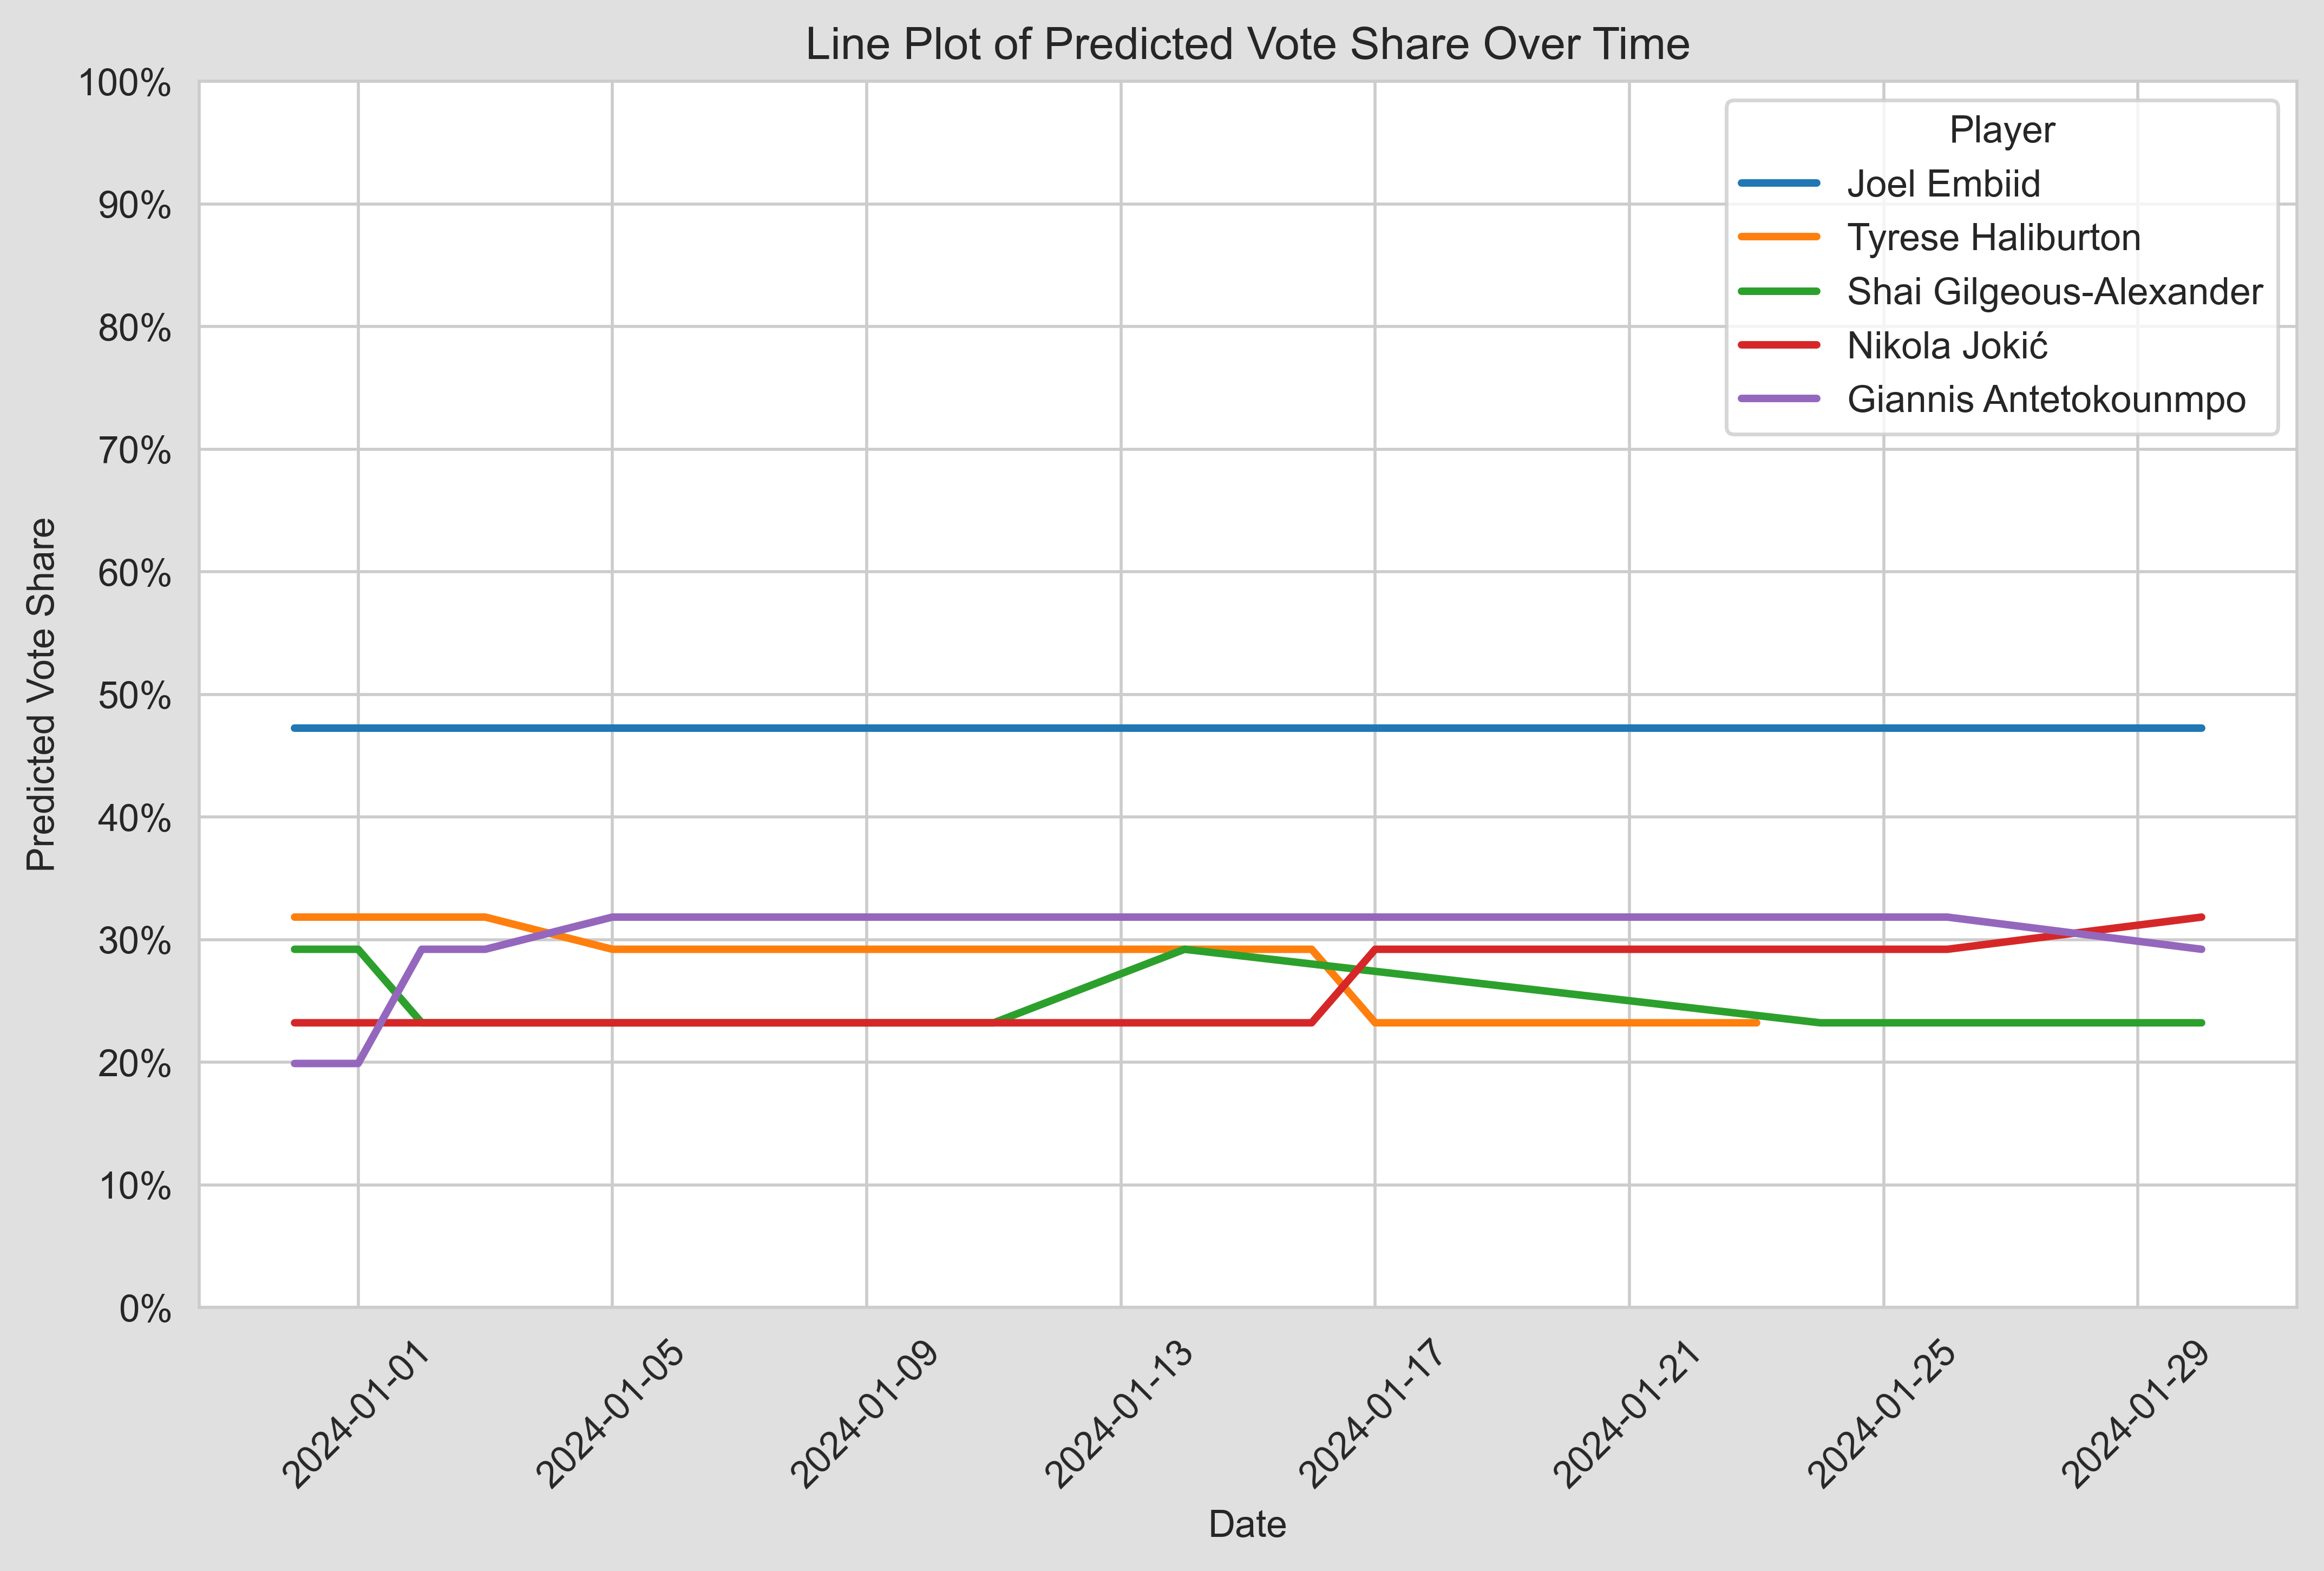

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Identify the most recent date
most_recent_date = df['Date'].max()

# Find top 5 players based on 'pred_rank' for the most recent date
top_5_players = df[df['Date'] == most_recent_date].nsmallest(5, 'pred_rank')['Player']

# Filter the DataFrame for only these top 5 players
best = df[df['Player'].isin(top_5_players)]

# Create the line plot with higher DPI and thicker lines
plt.figure(figsize=(10, 6), dpi=500,facecolor="#e0e0e0")
# sns.lineplot(data=best, x='Date', y='pred', hue='Player', style='Player', markers=True, dashes=False, linewidth=2)
sns.lineplot(data=best, x='Date', y='pred', hue='Player', markers=True, dashes=False, linewidth=2)
# Adjusting y-axis to show percentages (0-100%)
plt.yticks([i/10 for i in range(11)], [f'{i*10}%' for i in range(11)])

plt.xticks(rotation=45)


# Adding labels and title
plt.title('Line Plot of Predicted Vote Share Over Time')
plt.xlabel('Date')
plt.ylabel('Predicted Vote Share')

# Adding legend
plt.legend(title='Player')

# Show the plot
plt.show()

In [35]:
# Assuming df is your DataFrame



# Convert 'Predicted Vote Share' from percentage strings to floats
df['Predicted Vote Share'] = df['Predicted Vote Share'].astype(str).str.rstrip('%').astype('float') / 100
print(df.loc[:,['Predicted Vote Share',]])

# Fill NaN values in 'Predicted Vote Share' with values from 'pred'
if 'pred' in df.columns:
    df['Predicted Vote Share'].fillna(df['pred'], inplace=True)
    print(df.loc[:,['Predicted Vote Share','pred']])

    Predicted Vote Share
0                 0.4725
1                 0.3184
2                 0.2921
3                 0.2321
4                 0.2174
..                   ...
5                    NaN
6                    NaN
7                    NaN
8                    NaN
9                    NaN

[250 rows x 1 columns]
    Predicted Vote Share     pred
0                 0.4725  0.47252
1                 0.3184  0.31836
2                 0.2921  0.29211
3                 0.2321  0.23215
4                 0.2174  0.21738
..                   ...      ...
5                    NaN      NaN
6                    NaN      NaN
7                    NaN      NaN
8                    NaN      NaN
9                    NaN      NaN

[250 rows x 2 columns]


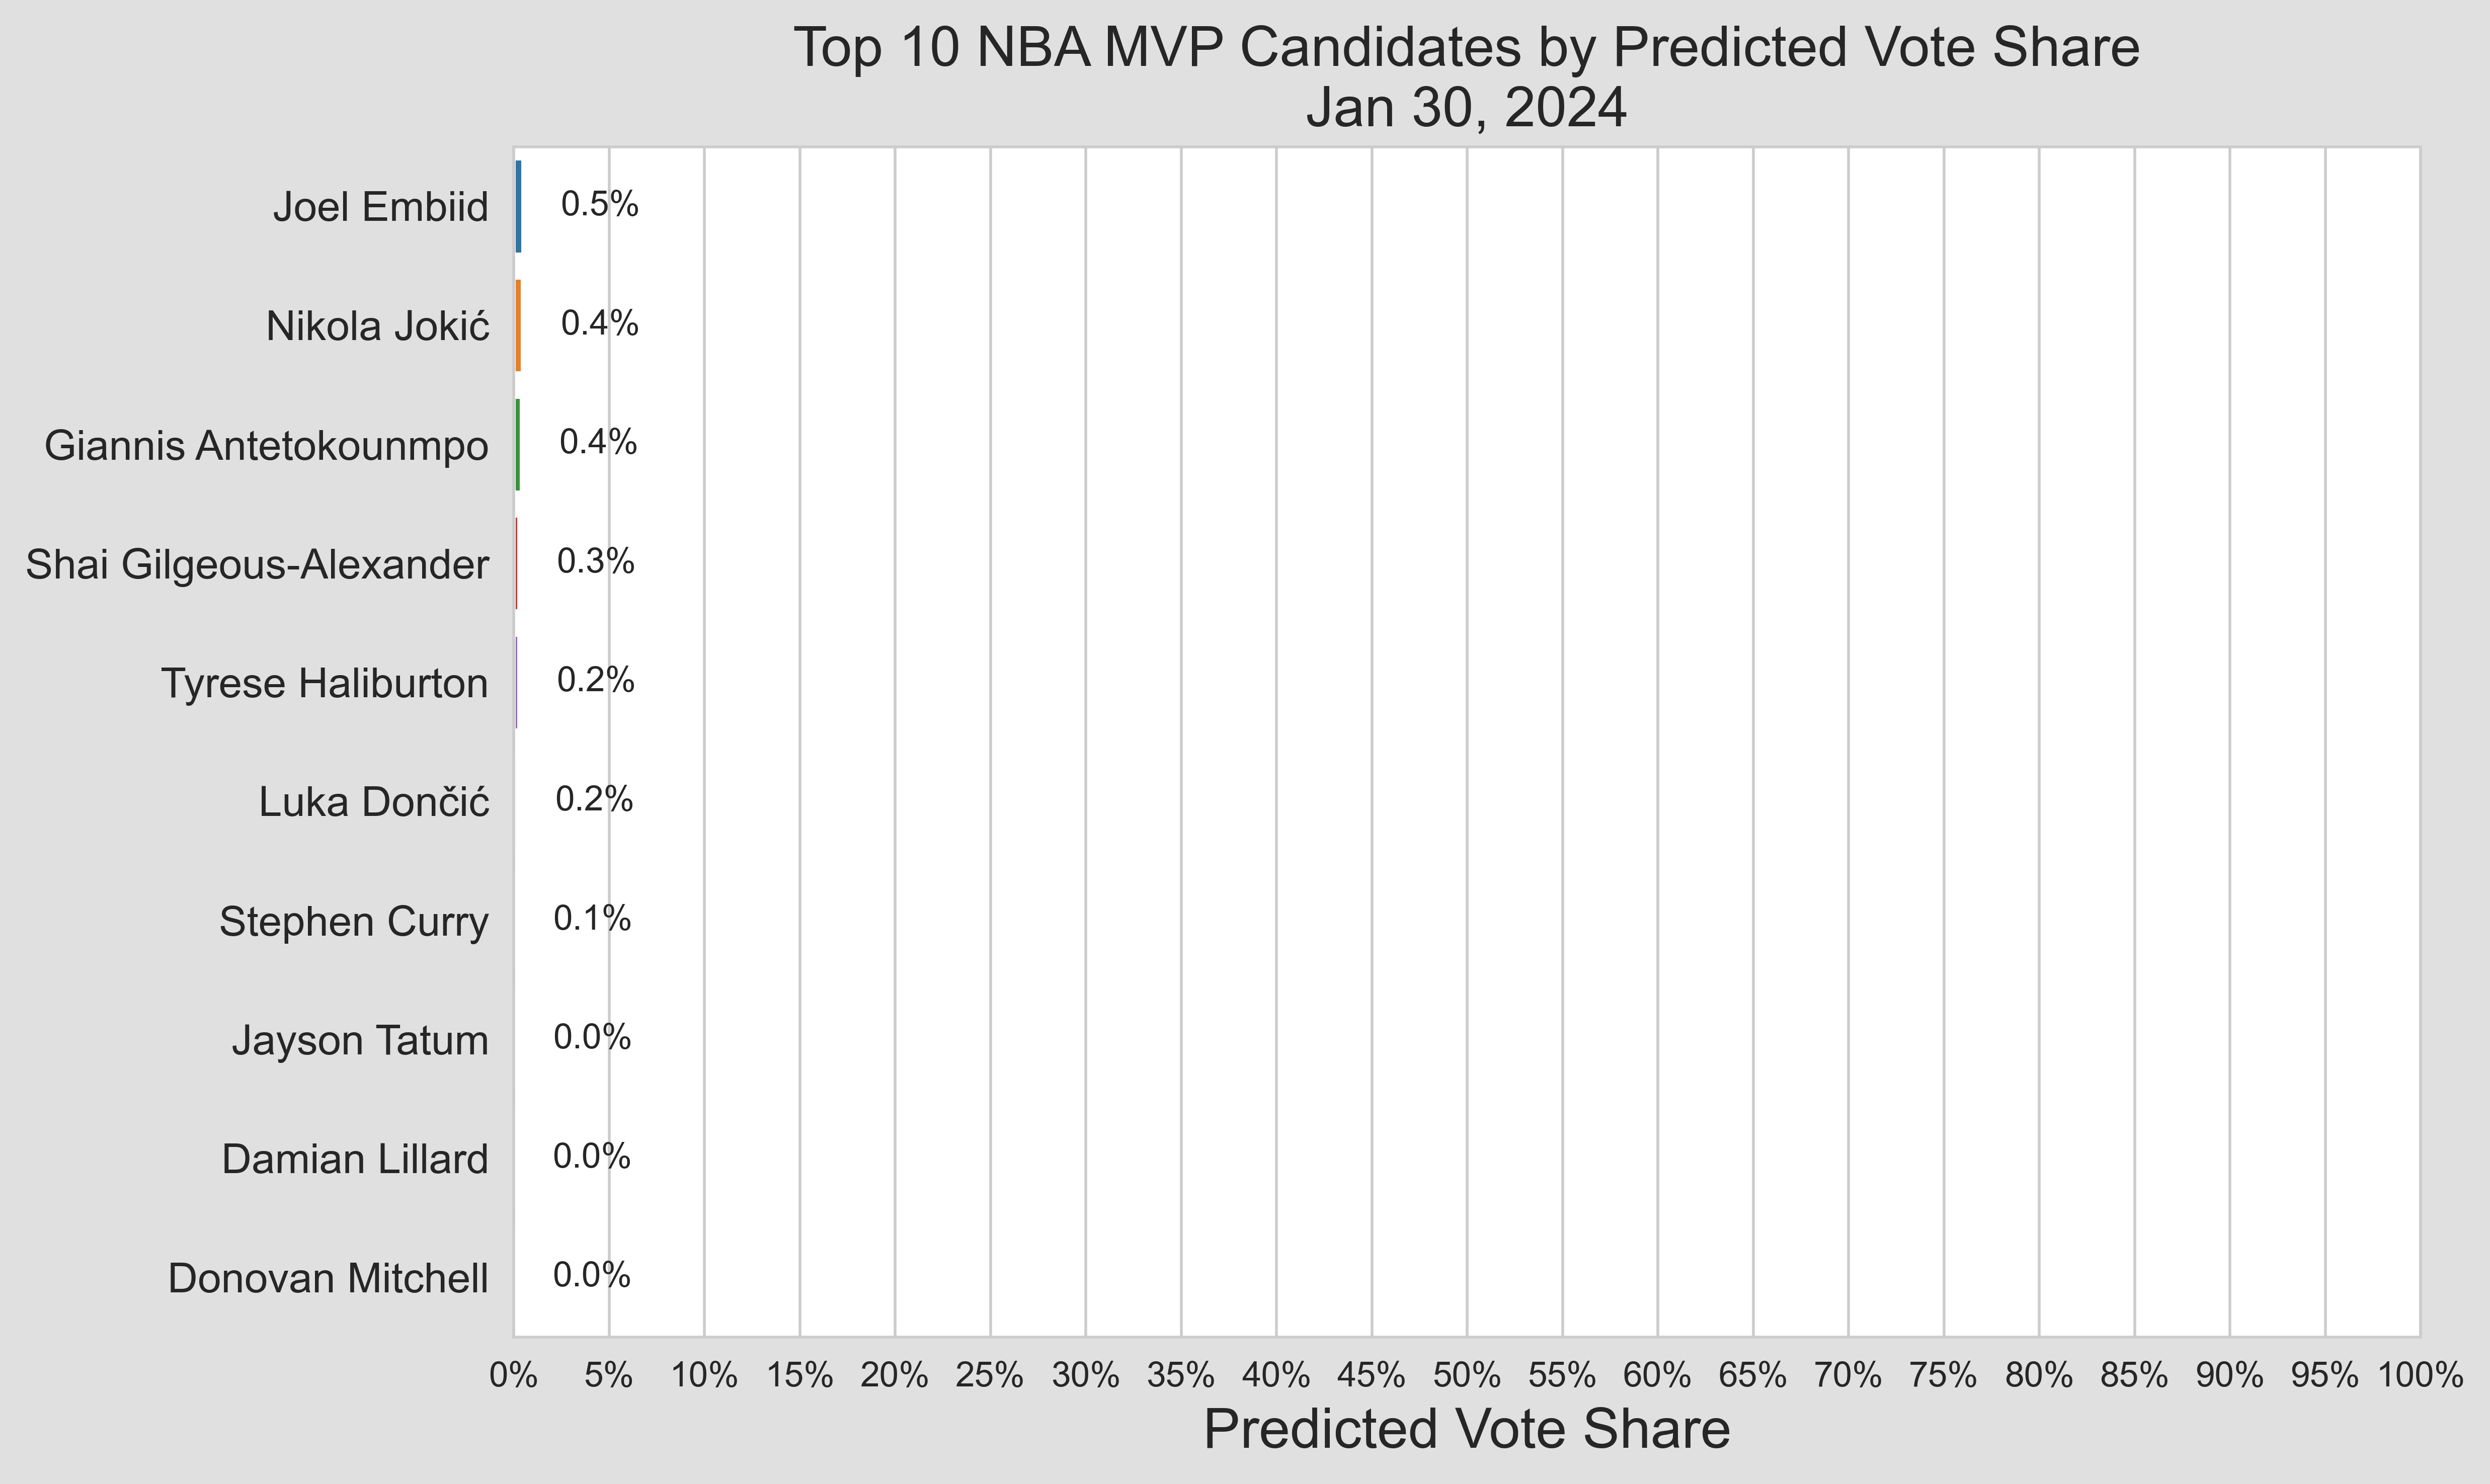

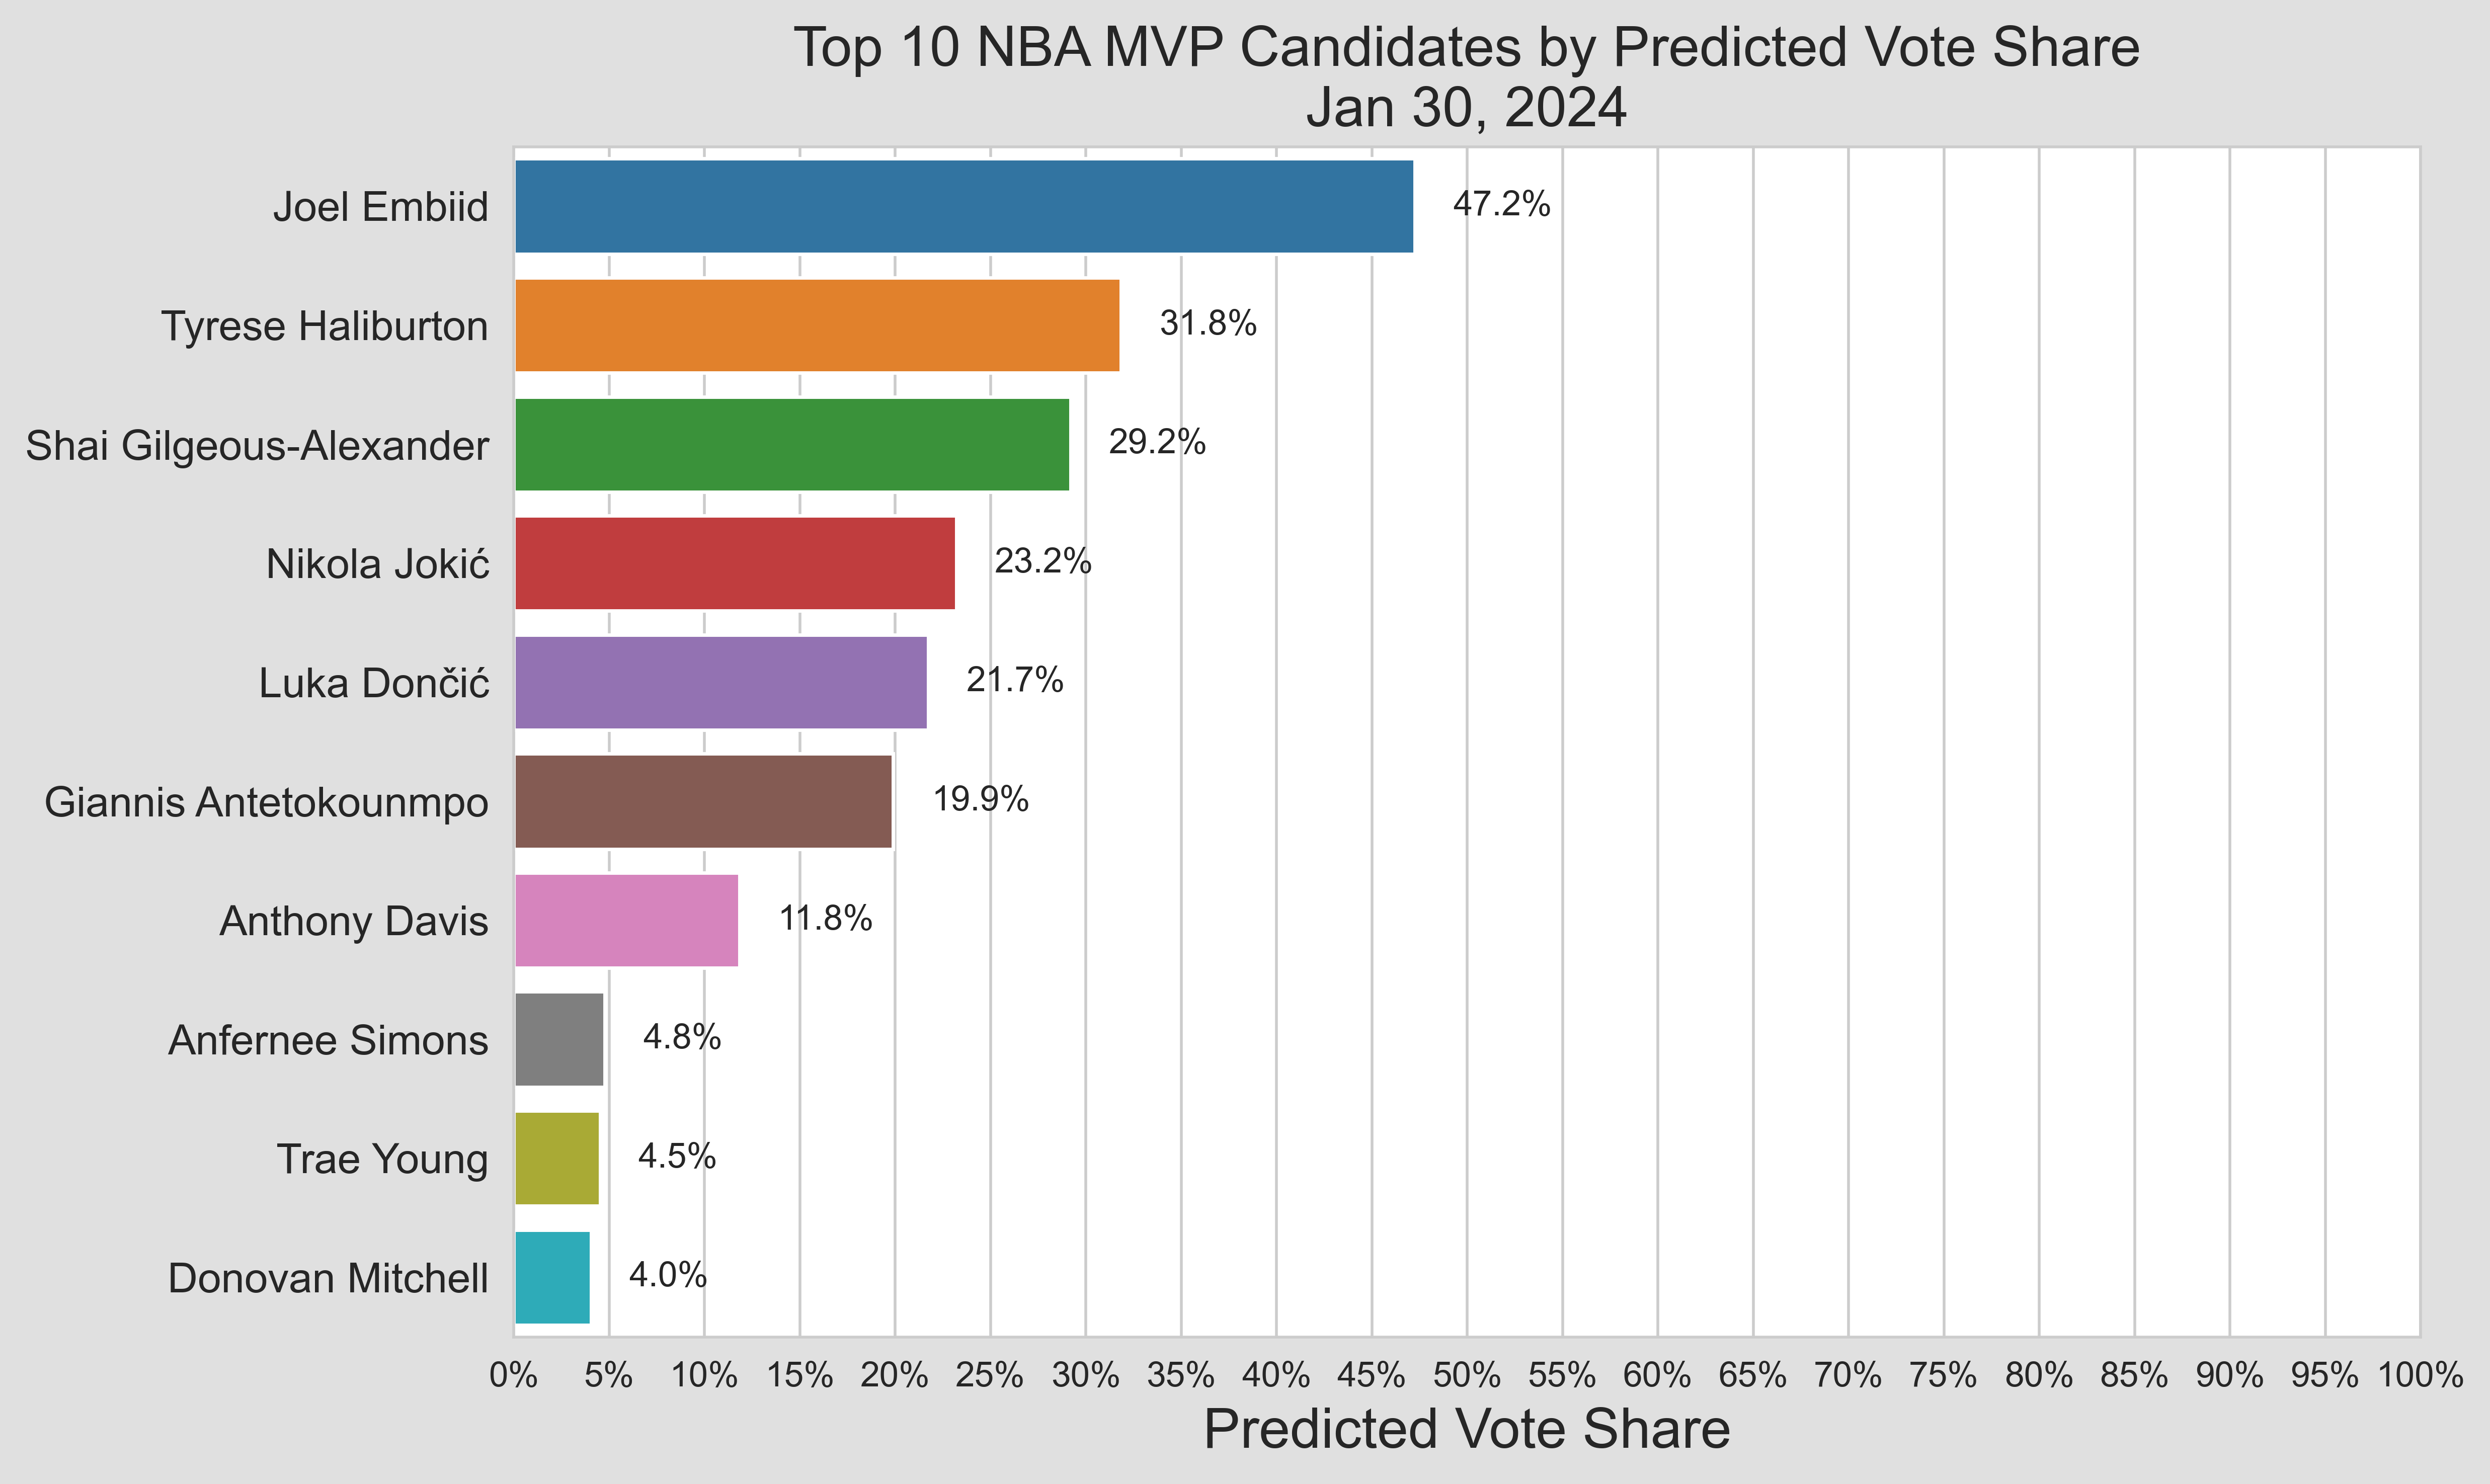

In [36]:
from matplotlib.ticker import FuncFormatter

df = df.sort_values('Predicted Vote Share',ascending=False)
# Function to format x-axis as percentage
def to_percentage(x, _):
    return '{:.0%}'.format(x)


# Plotting using seaborn with percentage formatting
plt.figure(figsize=(10, 6), dpi=500,facecolor="#e0e0e0")
ax = sns.barplot(x="Predicted Vote Share", y="Player", data=df.head(10),hue='Player')
ax.xaxis.set_major_formatter(FuncFormatter(to_percentage))
plt.xticks([i/100 for i in range(0, 101, 5)])

# Adding data labels
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.02,  # Slightly larger offset for text position
             p.get_y() + p.get_height() / 2,
             '{:.1%}'.format(width),
             va='center')

# Adjusting title and labels with larger fonts

plt.title(f"Top 10 NBA MVP Candidates by Predicted Vote Share\n{formatted_date}", fontsize=16)
plt.xlabel("Predicted Vote Share", fontsize=16)
plt.ylabel(None)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(f'{file}.png')
plt.show()